In [1]:
import cv2
import io
import numpy as np
import os
import pandas as pd
import sys
import time

from bson import ObjectId
from gridfs import GridFS
from PIL import Image, ImageFilter
from random import randint
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker

sys.path.append('../..')
sys.path.append('../../../ajna_docs/commons')


In [2]:
from ajna_commons.flask.conf import SQL_URI
from ajna_commons.utils.images import mongo_image, recorta_imagem
from virasana.db import mongodb as db
from virasana.integracao.conformidade_alchemy import Conformidade
engine = create_engine(SQL_URI)

2021-03-04 13:30:05,458 ajna         INFO     Configuração de log efetuada


Fazendo log de erros e alertas no arquivo  ../../../ajna_docs/commons\ajna_commons\flask\error.log
Fazendo log de atividade no arquivo  ../../../ajna_docs/commons\ajna_commons\flask\access.log


# Trazer lista de reefers

In [3]:
Session = sessionmaker(bind=engine)
session = Session()

In [66]:
rows = session.query(Conformidade.id_imagem).filter(Conformidade.isocode_group.startswith('R')).limit(1000).all()

60196e3a0be94217a2cfbc4d


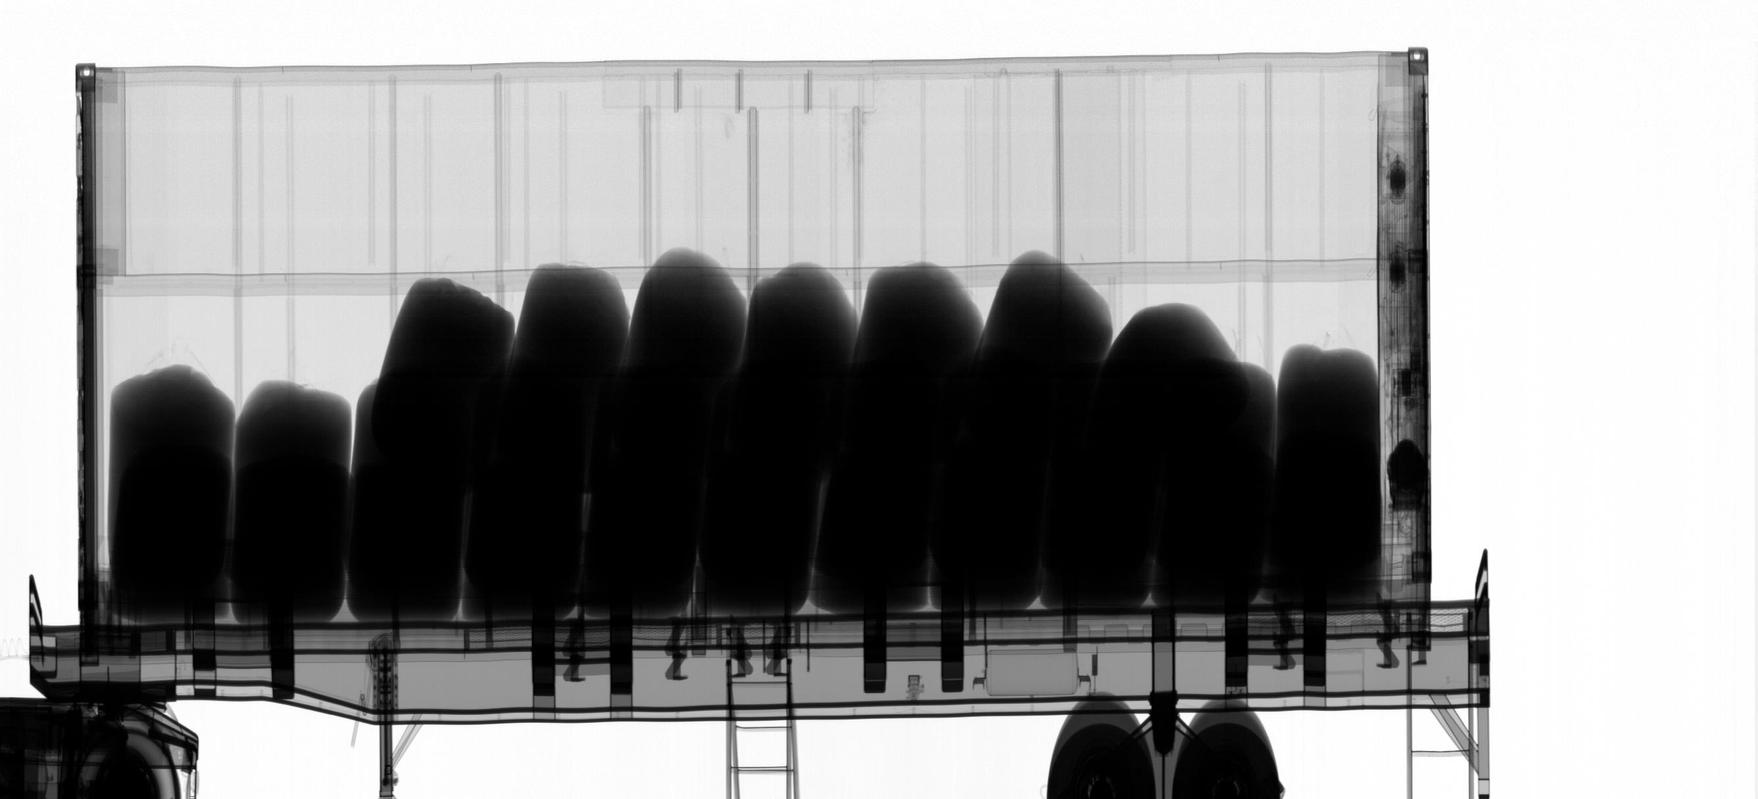

In [80]:
def rand_img(rows):
    i = randint(0, len(rows) - 1)
    _id  = rows[i][0]
    print(_id)
    image_bytes = mongo_image(db, _id)
    return Image.open(io.BytesIO(image_bytes))
rand_img(rows)

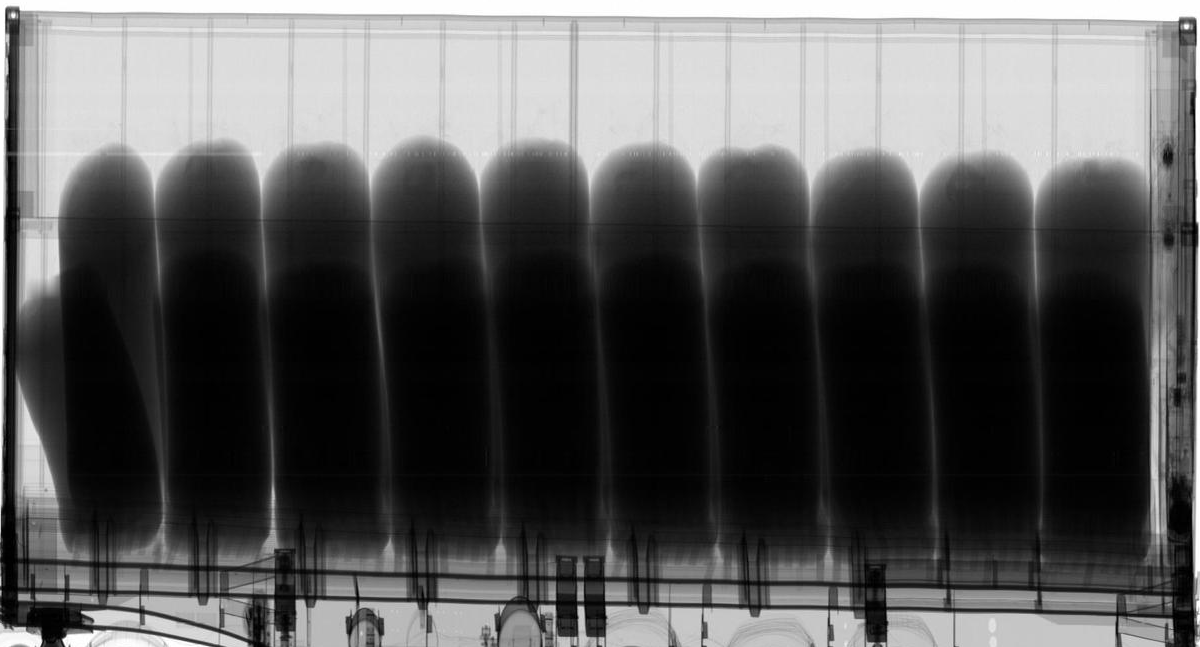

In [124]:
def rand_img_cropped(rows):
    i = randint(0, len(rows) - 1)
    _id  = rows[i][0]
    fs = GridFS(db)
    _id = ObjectId(_id)
    if fs.exists(_id):
        grid_data = fs.get(_id)
        preds = grid_data.metadata.get('predictions')
        if preds:
            bboxes = preds[0].get('bbox')
            image = grid_data.read()
            image = recorta_imagem(image, bboxes, pil=True)
            return image
rand_img_cropped(rows)

# Analisar nitidez

In [168]:
lista1 = session.query(Conformidade.id_imagem).filter(Conformidade.cod_recinto == 'EMBRAPORT').limit(1000).all()
lista2 = session.query(Conformidade.id_imagem).filter(Conformidade.cod_recinto == 'BTP1').limit(1000).all()

1969
861
-892


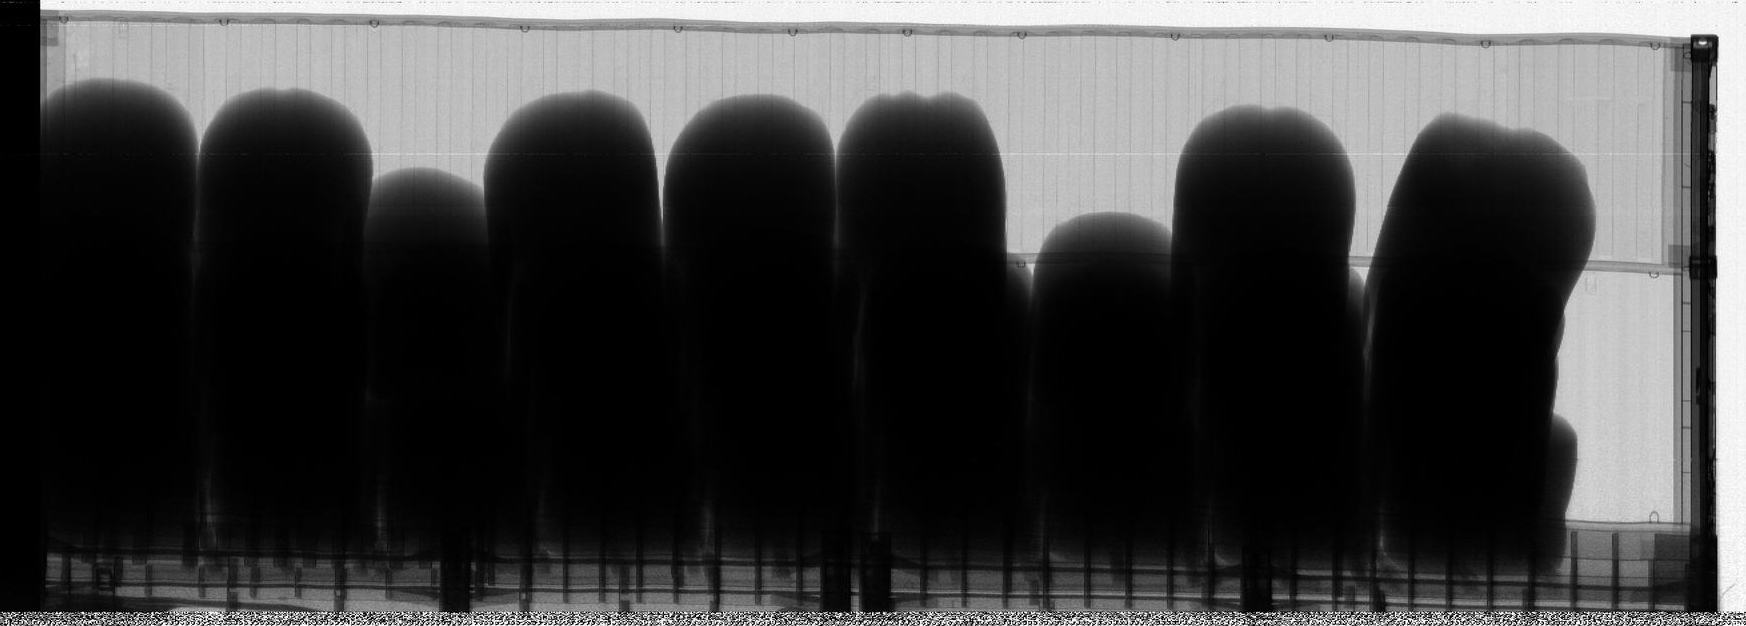

In [183]:
img1 = rand_img_cropped(lista1)
print(int(cv2.Laplacian(cv2.cvtColor(np.array(img1), cv2.COLOR_RGB2BGR), cv2.CV_32F).var()))
print(int(cv2.Laplacian(cv2.cvtColor(np.array(img1), cv2.COLOR_RGB2BGR), cv2.CV_32F).max()))
print(int(cv2.Laplacian(cv2.cvtColor(np.array(img1), cv2.COLOR_RGB2BGR), cv2.CV_32F).min()))
img1

169


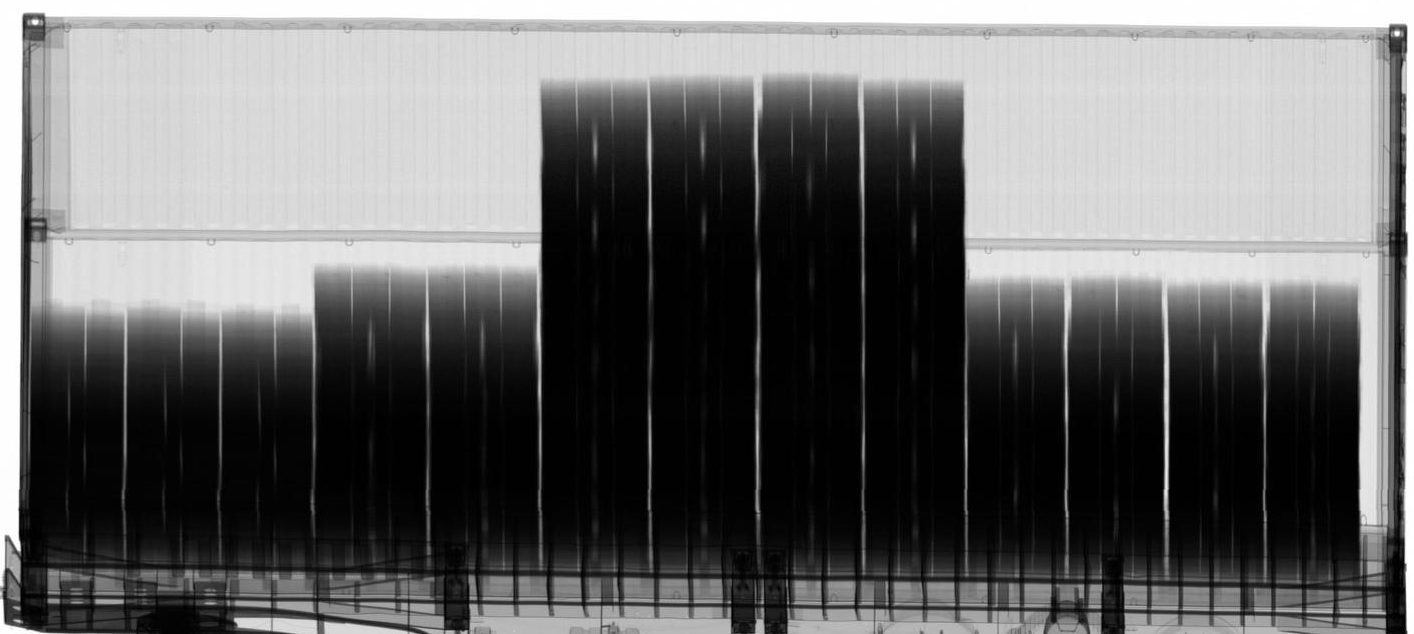

In [182]:
img2 = rand_img_cropped(lista2)
print(int(cv2.Laplacian(cv2.cvtColor(np.array(img2), cv2.COLOR_RGB2BGR), cv2.CV_32F).var()))
img2

In [39]:
int(cv2.Laplacian(cv2.cvtColor(np.array(img2), cv2.COLOR_RGB2BGR), cv2.CV_32F).var())

139

In [12]:
image1 = img1.filter(ImageFilter.FIND_EDGES)

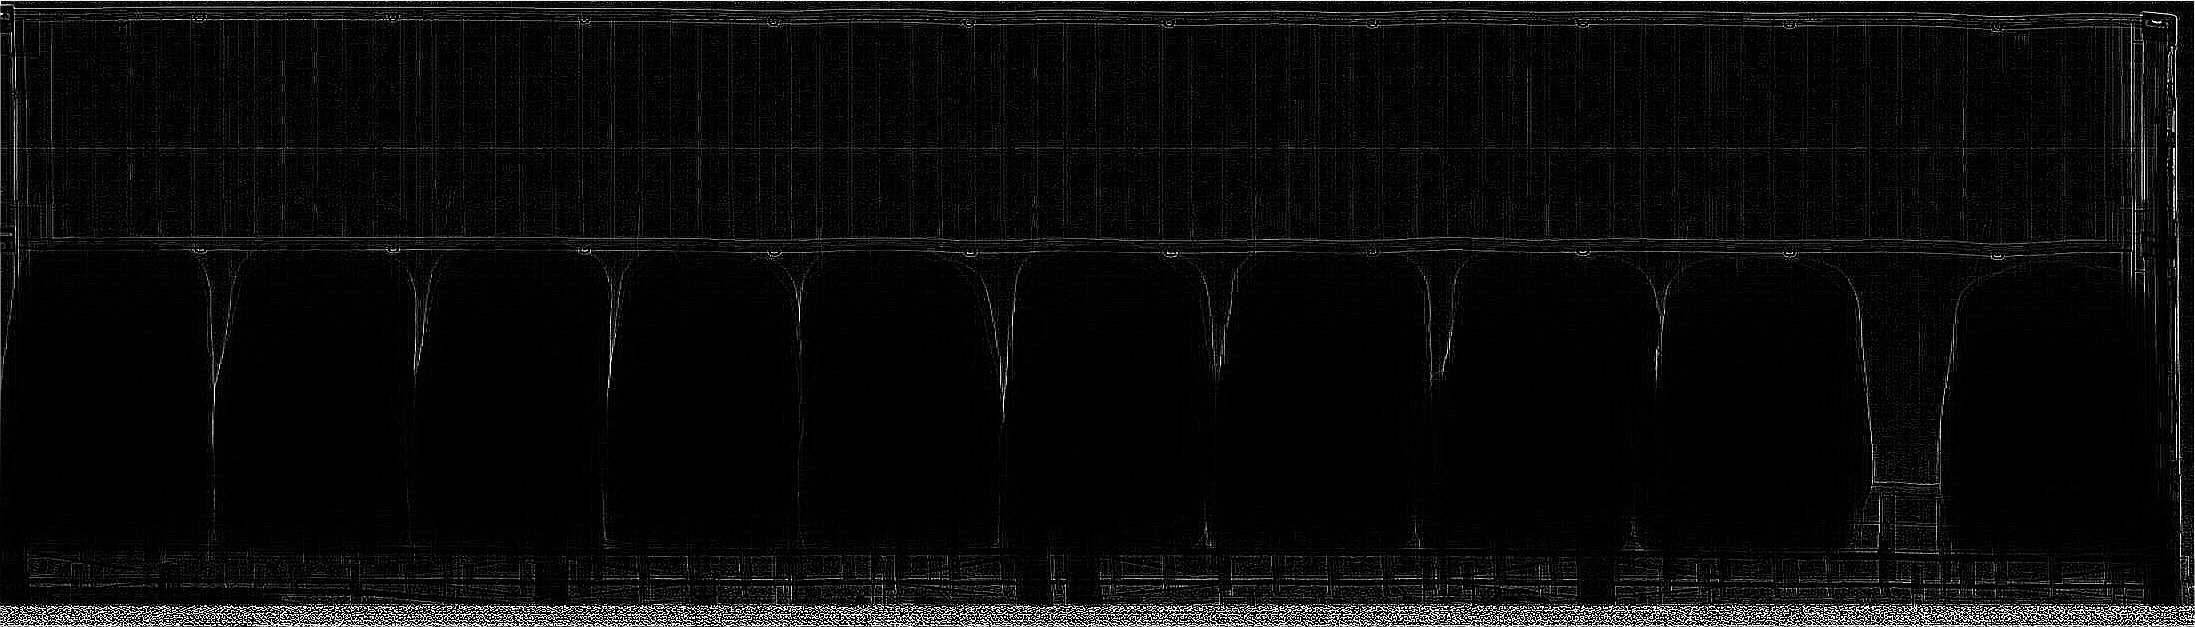

In [13]:
image1

In [14]:
np.array(image1).var()

1288.9149553208051

In [15]:
image2 = img2.filter(ImageFilter.FIND_EDGES)

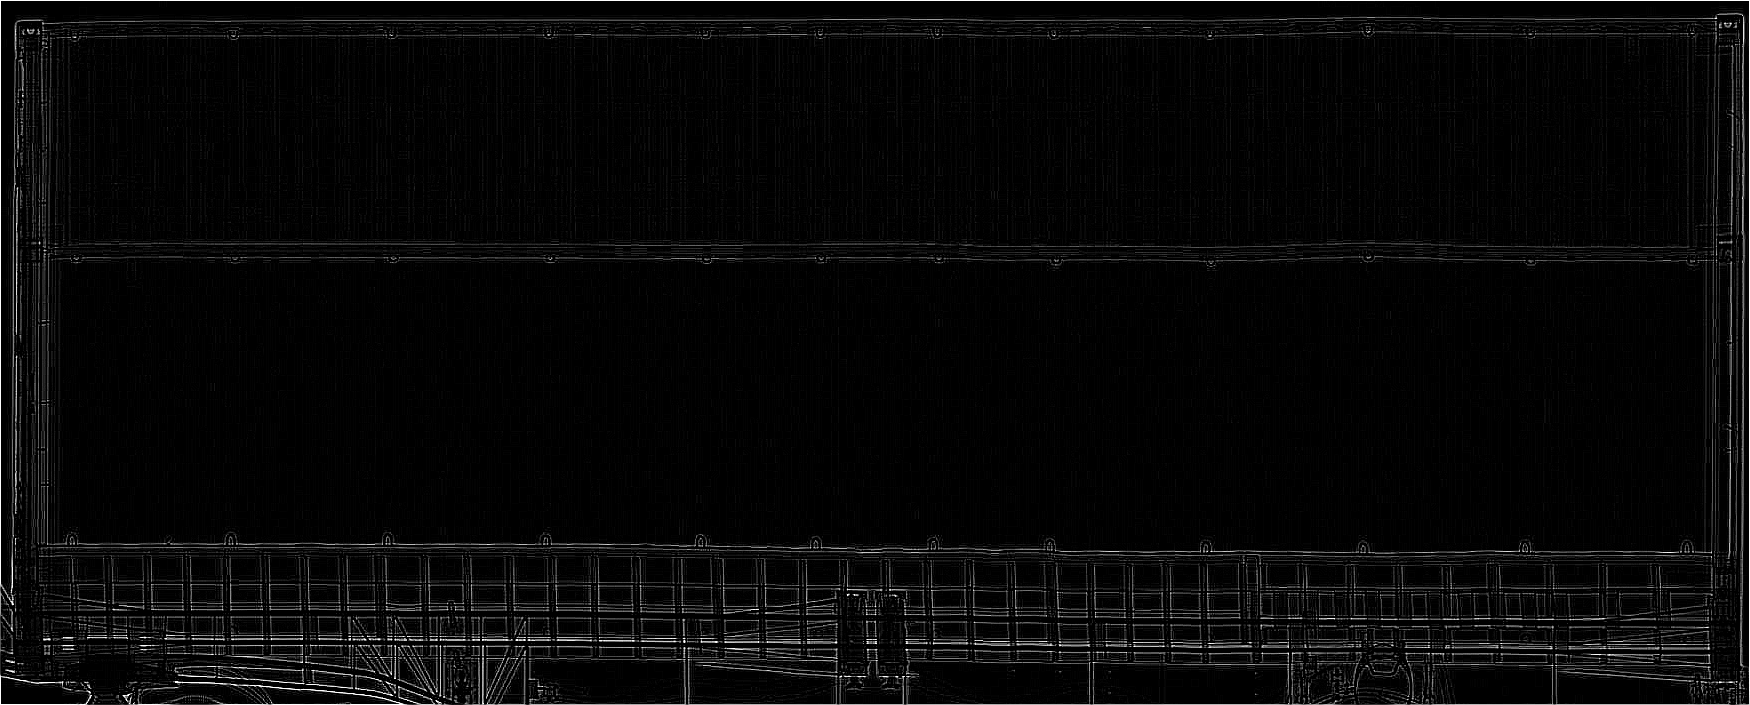

In [16]:
image2

In [17]:
np.array(image2).var()

673.9226731796886

103
214


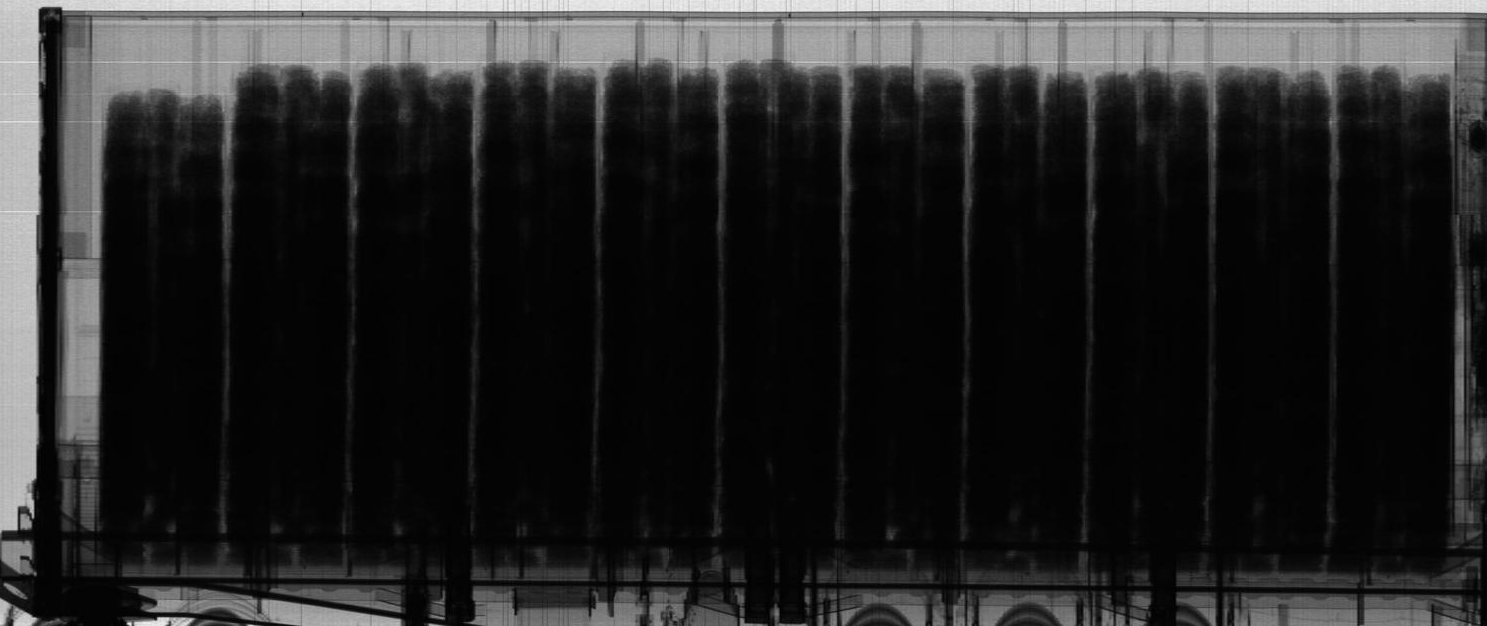

In [118]:
reefer_borrado = rand_img_cropped([['60196ed80be94217a2cfd1f5']])
print(int(cv2.Laplacian(cv2.cvtColor(np.array(reefer_borrado), cv2.COLOR_RGB2BGR), cv2.CV_32F).var()))
print(int(cv2.Laplacian(cv2.cvtColor(np.array(reefer_borrado), cv2.COLOR_RGB2BGR), cv2.CV_32F).max()))
reefer_borrado

125
158


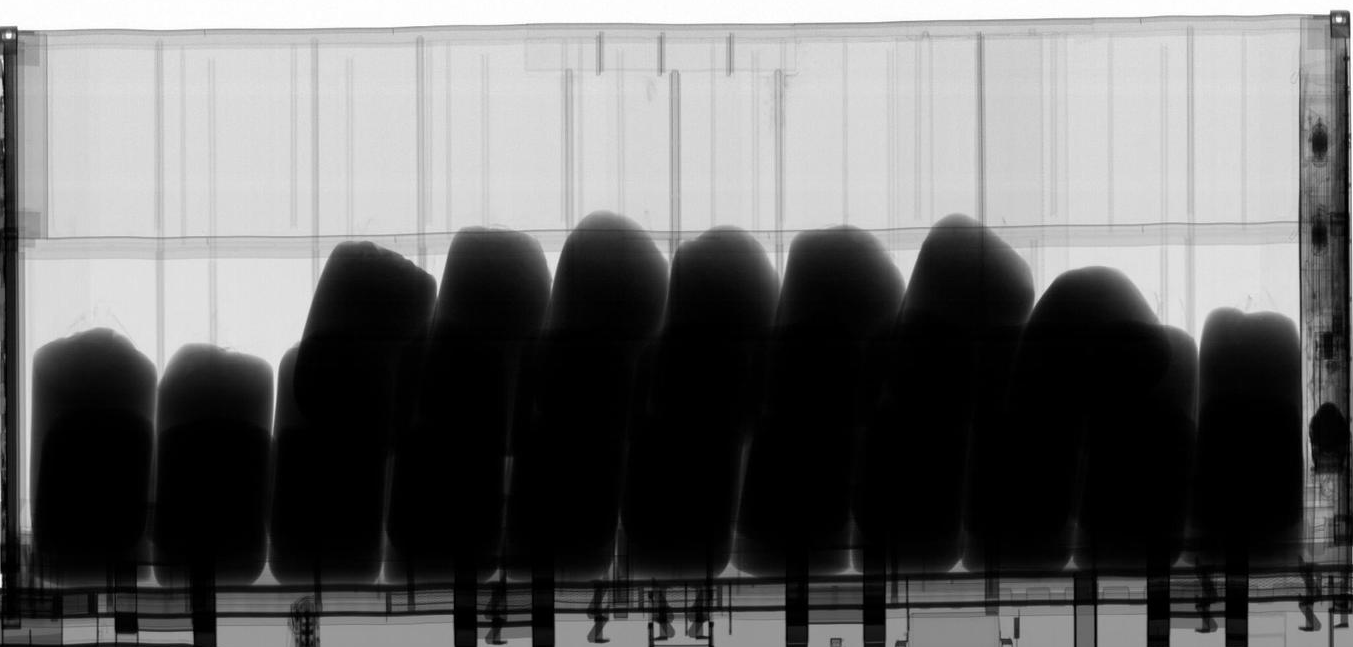

In [119]:
reefer_borrado = rand_img_cropped([['60196e3a0be94217a2cfbc4d']])
print(int(cv2.Laplacian(cv2.cvtColor(np.array(reefer_borrado), cv2.COLOR_RGB2BGR), cv2.CV_32F).var()))
print(int(cv2.Laplacian(cv2.cvtColor(np.array(reefer_borrado), cv2.COLOR_RGB2BGR), cv2.CV_32F).max()))
reefer_borrado

103

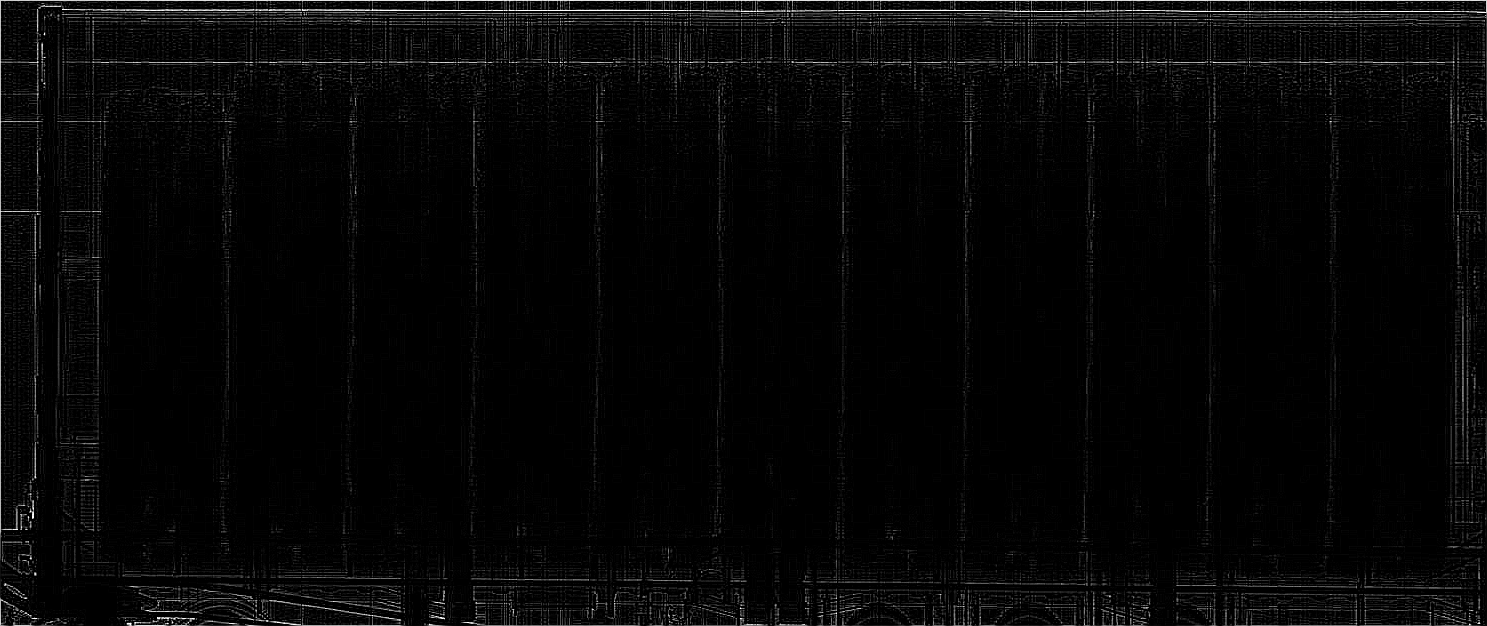

In [29]:
reefer_borrado2 = reefer_borrado.filter(ImageFilter.FIND_EDGES)
reefer_borrado2

In [30]:
np.array(reefer_borrado2).var()

450.86752361485327